In [101]:
import numpy as np 
from planar_utils import load_planar_dataset,plot_decision_boundary
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn


In [102]:
x,y=load_planar_dataset()

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr=LogisticRegression()
lr.fit(x.T,y.T)

D:\ana\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

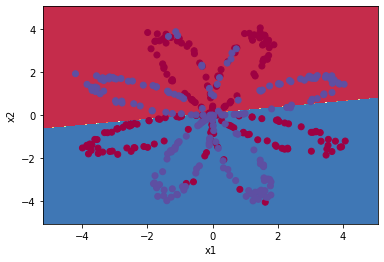

In [105]:
plot_decision_boundary(lambda i:lr.predict(i),x,y)

In [106]:
x.shape,y.shape

((2, 400), (1, 400))

In [107]:
def sig(z):
    return 1/(1+np.exp(-z))

In [118]:
def initialize_params(x,y,n_h):
    w1=np.random.randn(n_h,x.shape[0])*0.01
    b1=np.zeros((n_h,1))
    w2=np.random.randn(y.shape[0],n_h)*0.01
    b2=np.zeros((y.shape[0],1))
    params={
        'w1':w1,
        'w2':w2,
        'b1':b1,
        'b2':b2
    }
    return params

In [119]:
def layers(x,y):
    n_x=x.shape[0]
    n_h=4
    n_y=y.shape[0]
    return n_x,n_h,n_y
    

In [120]:
def forward_prop(x,params):
    w1=params['w1']
    w2=params['w2']
    b1=params['b1']
    b2=params['b2']
    
    z1=np.dot(w1,x)+b1
    a1=np.tanh(z1)
    z2=np.dot(w2,a1)+b2
    a2=sig(z2)
    
    assert(a2.shape==(1,x.shape[1]))
    
    save={
        'z1':z1,
        'z2':z2,
        'a1':a1,
        'a2':a2
    }
    
    return a2,save


    
    
    
    

In [121]:
def cost_co(a2,y,params):
    m=y.shape[1]
    l=np.dot(y,np.log(a2).T)+np.dot(1-y,np.log(1-a2).T)
    cost=np.float64(-l/m)
    cost=np.squeeze(cost)
    return cost

In [122]:
def back_prop(save,params,x,y):
    m=x.shape[1]
    w1=params["w1"]
    w2=params["w2"]
    a1=save["a1"]
    a2=save["a2"]
    dz2=a2-y
    dw2=np.dot(dz2,a1.T)*(1/y.shape[1])
    db2=(1/y.shape[1])*(np.sum(dz2,axis=1,keepdims=True))
    dz1=np.dot(w2.T,dz2)*(1-np.power(a1,2))
    dw1=np.dot(dz1,x.T)/m
    db1=np.sum(dz1,axis=1,keepdims=True)/y.shape[1]
    
    g={
        
        "dw2":dw2,
        "db2":db2,
        
        "dw1":dw1,
        "db1":db1
        
    }
    return g

In [123]:
def updated_params(params,g,lr=0.3):
    w1=params['w1']
    w2=params['w2']
    b1=params['b1']
    b2=params['b2'] 
    
    w1=w1-lr*g["dw1"]
    w2=w2-lr*g["dw2"]
    b1=b1-lr*g["db1"]
    b2=b2-lr*g["db2"]
    
    params={
        'w1':w1,
        'w2':w2,
        'b1':b1,
        'b2':b2
    }
    return params

In [129]:
def model(x,y,n_h,num_itr=1000):
    params=initialize_params(x,y,n_h)
    
    
    for i in range(num_itr):
        a2,save=forward_prop(x,params)
        cost=cost_co(a2,y,params)
        g=back_prop(save,params,x,y)
        params=updated_params(params,g,lr=0.3)
        
        
#         if i%50==0:
#             print(i,cost)
    return params        
    

In [130]:
def predict(params,x):
    
    a2,save=forward_prop(x,params)
    predict = (a2>0.5)
    return predict
    

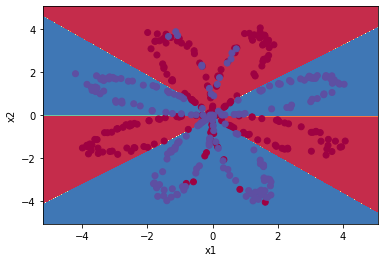

In [131]:
params = model(x,y,n_h=4,num_itr=3000)
plot_decision_boundary(lambda i : predict(params, i.T),x,y)

In [132]:
accuracy=(predict(params,x)==y).sum()/x.shape[1]
accuracy*100

88.5

In [136]:
nodes=[1,2,3,4,5,10,20,50,70,100,200]
for i in nodes:
    params = model(x,y,i,num_itr=3000)
    y_pred=predict(params,x)
    accuracy=(predict(params,x)==y).sum()/x.shape[1]
    print(accuracy*100," ",i)


    

67.75   1
65.25   2
88.5   3
87.75   4
88.5   5
88.0   10
88.5   20
88.75   50
89.0   70
88.5   100
88.25   200
